<a href="https://colab.research.google.com/github/Bryce-R/MiniProjects/blob/master/Gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np 
import matplotlib.pyplot as plt

In [35]:
ks = np.array([1.0, 1.0],dtype=np.double)
def f1(x1, x2):
  return ks[0]*x1 + ks[1]*x2

def df1(x1, x2):
  return ks

In [27]:
def circle(x1, x2):
  return x1**2 + x2**2 - 1 
def dcircle(x1, x2):
  return np.array([2.0*x1, 2.0*x2],dtype=np.double)/circle(x1,x2)
def circleBarrier(x1,x2):
  return np.log(-circle(x1, x2))
def drawCircle():
  num = 101 
  rad = np.pi/(num-1)*2
  x = np.zeros((2, num),dtype=np.double)
  for i in range(num):
    x[0,i] = np.cos(i*rad)
    x[1,i] = np.sin(i*rad)
  return x

In [28]:
def linear(x1, x2, k1, k2, c):
  return x1*k1 + x2*k2 - c 
def dlinear(x1, x2, k1, k2):
  return np.array([k1, k2],dtype=np.double)

def drawLinear(k1, k2, c):
  num = 2 
  x = np.zeros((2, num),dtype=np.double)
  if k1 == 0.0:
    x[0,0] = -2.0
    x[1,0] = c/k2
    x[0,1] = 2.0
    x[1,1] = c/k2
  elif k2 == 0.0:
    x[0,0] = c/k1
    x[1,0] = -2.0
    x[0,1] = c/k1
    x[1,1] = 2.0
  else:
    x[0,0] = c/k1
    x[1,0] = 0.0
    x[0,1] = 0.0
    x[1,1] = c/k2
  return x

In [29]:
k1 = 0.0 
k2 = -1.0
c = 0.5
def linear1(x1,x2):
  return linear(x1,x2,k1,k2,c)
def dlinear1(x1,x2):
  return dlinear(x1,x2,k1,k2)/linear(x1,x2,k1,k2,c)
def drawLinear1():
  return drawLinear(k1, k2, c)
def linearAndCircle(x1,x2):
  return np.maximum(linear1(x1,x2), circle(x1, x2))
def linearAndCircleBarrier(x1,x2):
  return np.log(-linear1(x1,x2))+ np.log(-circle(x1, x2))
def dlinearAndCircle(x1,x2):
  return dlinear1(x1,x2) + dcircle(x1, x2)

In [30]:
def GD(x0):
  x = x0
  maxIter = 200
  x_history = np.zeros((2, maxIter),dtype=np.double)
  x_history[:,0] = x0
  step = 0.2
  k = 1
  for i in range(1,maxIter):
    x -= step*df1(x[0], x[1])
    x_history[:, k] = x
    k += 1
    if circle(x[0],x[1])>=0.0:
      break
  x_history = x_history[:,:k]
  return x_history

In [38]:
def BarrierGD(x0):
  maxIter = 8
  maxInnerIter = 30

  x = x0
  x_history = np.zeros((2, maxIter*maxInnerIter+1),dtype=np.double)
  x_history[:,0] = x0
  
  t = 1.0
  mu = 5.0 # t is scaled by this each outer iteration 
  max_t = 2000
  step_tol = 1e-8
  ## gradient descent on t*f(x) + phi(x) 
  # phi(x) is the barrier on inequality constraints phi(x) = -log(-g(x)) 
  # g(x)<=0.0
  # d(phi(x))/dx = - (d(gx)/dx) / g(x)
  ### constraint function, constraint function derivative, linearAndCircleBarrier
  cons, dCons, barrierCons = linearAndCircle, dlinearAndCircle, linearAndCircleBarrier
  # cons, dCons, barrierCons = circle, dcircle, circleBarrier
  k = 1
  for i in range(maxIter):
    step = 0.3
    # infeasibility handling 
    while cons(x[0],x[1]) > 0.0:
      # infeasible 
      gradient = dCons(x[0],x[1])
      before_cost = cons(x[0], x[1])
      while step >= step_tol:
        x_after = x - step*gradient
        after_cost = cons(x_after[0], x_after[1])
        if after_cost < before_cost:
          x_history[:, k] = x_after 
          x = x_after 
          k += 1 
          break
        else:
          step /= 2.0
    for j in range(maxInnerIter):
      before_cost = t*f1(x[0], x[1]) - barrierCons(x[0], x[1])
      gradient = t*df1(x[0], x[1]) - dCons(x[0],x[1])
      if np.linalg.norm(gradient)<1e-5:
        print("iter: {}, innerIter: {}. gradien norm < 1e-5, exiting inner loop.".format(i,j))
        break
      while step >= step_tol:
        x_after = x - step*gradient
        if cons(x_after[0],x_after[1]) >= -1e-5:
          step /= 2.0
          continue
        after_cost = t*f1(x_after[0], x_after[1]) - barrierCons(x_after[0], x_after[1])
        # print(t*f1(x[0], x[1]), barrierCons(x[0], x[1]))
        print("before_cost, gradient, after_cost:", before_cost, gradient, after_cost)
        if after_cost < before_cost:
          x_history[:, k] = x_after 
          x = x_after 
          k += 1 
          print("step, gradient, x: ",step, gradient, x)
          break
        else:
          step /= 2.0
      if(step < step_tol):
        print('iter: {}, innerIter: {}. step < tol, exiting inner loop.'.format(i,j)) 
        break
    t = t*mu
    if t >= max_t:
      print("exit, t = {}".format(t))
      break
  x_history = x_history[:,:k]
  return x_history

before_cost, gradient, after_cost: 0.7364934391916744 [ 0.79591837 -1.70408163] 0.49931471694360097
step, gradient, x:  0.3 [ 0.79591837 -1.70408163] [-0.33877551  0.41122449]
before_cost, gradient, after_cost: 0.49931471694360097 [0.05386563 1.05104593] 0.4038713604765575
step, gradient, x:  0.3 [0.05386563 1.05104593] [-0.3549352   0.09591071]
before_cost, gradient, after_cost: 0.4038713604765575 [ 0.17917181 -0.45629927] 0.3850234149013118
step, gradient, x:  0.3 [ 0.17917181 -0.45629927] [-0.40868674  0.23280049]
before_cost, gradient, after_cost: 0.3850234149013118 [-0.04955757  0.23323226] 0.38066025839581574
step, gradient, x:  0.3 [-0.04955757  0.23323226] [-0.39381947  0.16283082]
before_cost, gradient, after_cost: 0.38066025839581574 [ 0.03757784 -0.11075212] 0.3796096469157772
step, gradient, x:  0.3 [ 0.03757784 -0.11075212] [-0.40509282  0.19605645]
before_cost, gradient, after_cost: 0.3796096469157772 [-0.01595558  0.05503617] 0.37935987209791655
step, gradient, x:  0.3 [

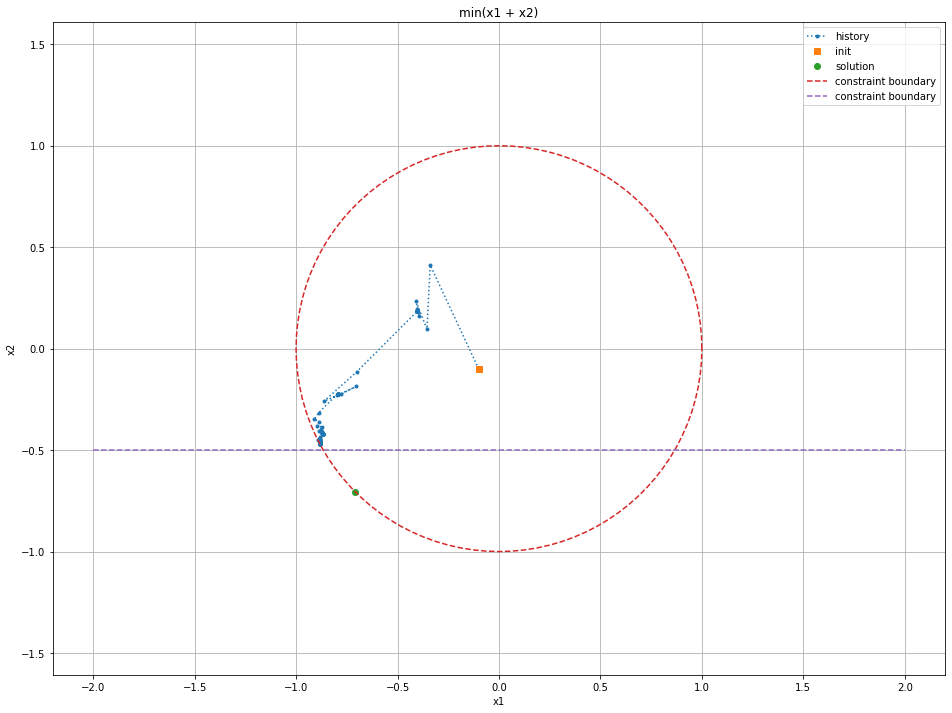

In [39]:
# x0 = np.array([0.1, 0.1],dtype=np.double)
x0 = np.array([-0.1, -0.1],dtype=np.double)
# x0 = np.array([-0.5, 0.5],dtype=np.double)
# x0 = np.array([0.5, -0.5],dtype=np.double)
# x0 = np.array([-0.5, 1.2],dtype=np.double)

# opt = GD
opt = BarrierGD

x_history = opt(x0)
# '{:-9} YES votes  {:2.2%}'.format(yes_votes, percentage)
print('Optimal solution x1 = {}, x2 = {}.'.format(x_history[0,-1], x_history[1,-1]))
# print(x_history)
print(f1(x_history[0,-1], x_history[1,-1]))
# plt.figure(figsize=(12, 9))
plt.figure(figsize=(16, 12))
plt.plot(x_history[0,:], x_history[1,:], '.:', label='history')
plt.plot(x_history[0,0], x_history[1,0], 's', label='init')
# for i in range(1, x_history.shape[1]):
#   dx = x_history[0,i] - x_history[0,i-1]
#   dy = x_history[1,i] - x_history[1,i-1]
#   plt.arrow(x_history[0,i-1], x_history[1,i-1], dx, dy, head_width=0.04, head_length=0.1, linewidth=1, color='r', length_includes_head=True)

plt.plot([-np.sqrt(2)/2], [-np.sqrt(2)/2], 'o', label='solution')
boundary = drawCircle()
plt.plot(boundary[0,:], boundary[1,:], '--', label='constraint boundary')
boundary = drawLinear1()
plt.plot(boundary[0,:], boundary[1,:], '--', label='constraint boundary')
plt.axis('equal')
plt.legend()
plt.title("min(x1 + x2)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.show()

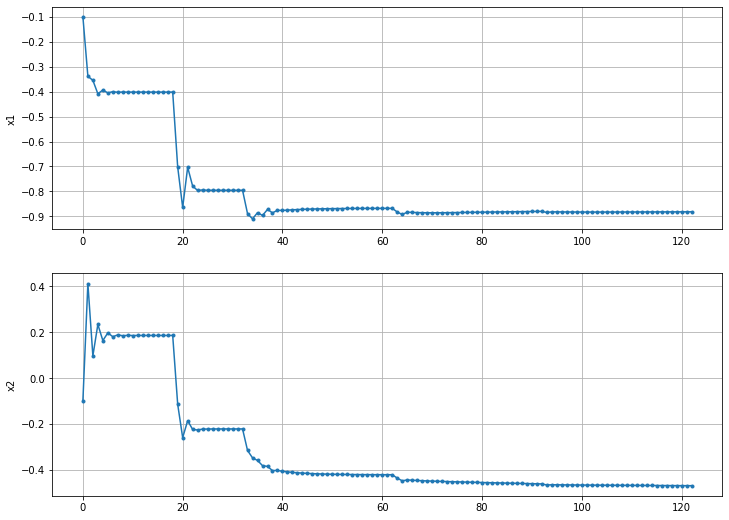

In [40]:
plt.figure(figsize=(12, 9))
# plt.figure(figsize=(16, 12))

plt.subplot(2, 1, 1)
plt.plot(x_history[0,:],'.-')
plt.ylabel("x1")
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(x_history[1,:],'.-')
plt.ylabel("x2")
plt.grid()
plt.show()